# Excercise 1. Regression


In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

b) Use describe only on those columns that are relevant to get statistical information from.

c) Make some plots on some of the columns that you find interesting.

d) Check if there are any columns you might want to drop.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

In [14]:
df = sns.load_dataset("mpg")

#Snabb översikt av tabellen och dess kolumner
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
#Översikt - vilke datatyper har tabellen? Finns det null-värden?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
#Skaper en pd.series och skriver ut nullvärden i kolumnen 'horsepower', som är den enda kolumn som innehåller nullvärden
df[df['horsepower'].isna()]



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


##### Avvägning - hur göra med null-värden?
Jag kan droppa raderna helt och skapa en städad DataFrame.   
Jag kan lägga till ett default-värde   
Jag kan göra en uppskattning av vilka hästkrafter som bilarna borde ha   
Jag kan manuellt ta reda på vilka hästkrafter som bilarna har och ändra värderna manuellt.     
   
Väljer i detta fall att skapa en städad df och droppa raderna. 

In [7]:
df_cleaned = df.dropna(subset=["horsepower"])
print(len(df), "--> ", len(df_cleaned))

398 -->  392


##### Avvägning - finns det kolumner som inte är relevanta för prediktionen?

Jag är inte jättebra på bilar, och har svårt att avgöra vilka parametrar som är relevanta att behålla.  
'Origin' känns inte relevant, så jag väljer att ta bort den.      
Ställer fråga till ChatGPT, som även tycker att namn oftast inte värt att ta med i detta sammanhang.   

Droppar därför kolumnerna 'origin' och 'name'. 

In [8]:
df_cleaned = df.drop(columns=["origin", "name"])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [9]:
df_cleaned["mpg"].max()

np.float64(46.6)

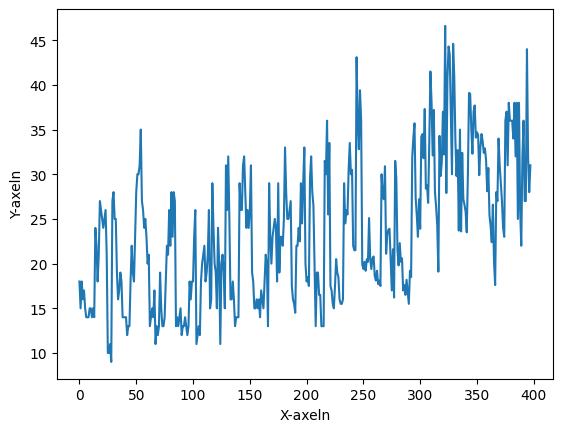

In [10]:
plt.plot(df_cleaned["mpg"])

plt.xlabel("X-axeln")
plt.ylabel("Y-axeln")
plt.show()

In [ ]:
data = df_cleaned.copy()


data = df.copy()
data["cylinders"] = data["cylinders"].astype("category")
sns.pairplot(
    data=data,
    vars=["mpg","displacement","horsepower","weight","acceleration","model_year"],
    hue="cylinders",
    diag_kind="hist",
    plot_kws={"alpha":0.6}
)
plt.show()

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", center=0, cmap="coolwarm")
plt.title("Korrelationer")
plt.show()

In [ ]:
for col in ["cylinders","displacement","horsepower","weight","acceleration","model_year"]:
    sns.lmplot(data=df_cleaned, x=col, y="mpg", scatter_kws={"alpha":0.6}, line_kws={"lw":2})
    plt.title(f"mpg vs {col}")
    plt.show()

In [ ]:
mpg_by_year = df.groupby("model_year", as_index=False)["mpg"].mean()
sns.lineplot(data=mpg_by_year, x="model_year", y="mpg", marker="o")
plt.title("Genomsnittlig mpg per model_year"); plt.show()

a) We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn.   
Choose test_size of 0.2 and random_state 42.   
Control the shapes of each X_train, X_test, y_train, y_test.



In [ ]:
from sklearn.model_selection import train_test_split



In [50]:
df = df.dropna(subset=["horsepower"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [51]:
y = df["mpg"]
X = df[["cylinders", "displacement", "horsepower", "weight", "weight", "model_year" ]]

y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [52]:
X.head()

,cylinders,displacement,horsepower,weight,weight,model_year
0,8,307.0,130.0,3504,3504,70
1,8,350.0,165.0,3693,3693,70
2,8,318.0,150.0,3436,3436,70
3,8,304.0,150.0,3433,3433,70
4,8,302.0,140.0,3449,3449,70


### Linear Regression - Vad gör varje steg?   
    1. Train/Test-split – dela upp data så du kan träna på en del och mäta på osedda rader.   
    
    2. Feature scaling – standardisera features (fit på train, transformera train och test).   
    
    3. Linjär regression – träna modellen på träningsdatan.   
    
    4. Prediction – gör förutsägelser på train/test (och ev. nya exempel).   
    
    5. Utvärdering – mät kvalitet (R², MAE, RMSE).   


### Step 1 --> Train/test - split

In [53]:
# Train|test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [55]:
print(y_train.shape)
print(y_test.shape)

(262,)
(130,)


In [56]:
print(X_train.shape)
print(X_test.shape)

(262, 6)
(130, 6)


### Step2 --> Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

scaler

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [59]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(scaled_X_train.shape)
print(scaled_X_train.min())
print(scaled_X_train.max())

(262, 6)
0.0
1.0000000000000002


In [60]:
print(scaled_X_test.shape)
print(scaled_X_test.min())
print(scaled_X_test.max())

(130, 6)
-0.01098901098901095
1.0


### Step3 --> Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
model.fit(scaled_X_train, y_train)

model.coef_

array([ -0.66976036,   0.67208222,  -3.99939923, -10.76812874,
       -10.76812874,   8.38537239])

In [65]:
model.intercept_

np.float64(29.156929071393403)

### Step4 --> Prediction

##### prediction 1(?)

In [68]:
test_sample_features = scaled_X_test[0].reshape(1, -1)
test_sample_target = y_test.values[0]
test_sample_features


array([[0.2       , 0.06753247, 0.11538462, 0.1633116 , 0.1633116 ,
        0.16666667]])

In [69]:
model.predict(test_sample_features)

array([26.48733671])

In [70]:
test_sample_target

np.float64(26.0)

##### prediction on testdata

In [74]:
y_pred = model.predict(scaled_X_test)

print(y_pred.shape)
print(y_test.shape)

(130,)
(130,)


In [79]:
y_pred[:5]

array([26.48733671, 26.01252349, 33.24434467, 27.18668285, 29.50861278])

In [78]:
y_test[:5].values

array([26. , 21.6, 36.1, 26. , 27. ])

### Step5 --> Evaluation

MAE --> mean absolute error 
MSE --> mean squared error
RMSE --> root mean squared error

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"{mae = :.2f}")
print(f"{mse = :.2f}")
print(f"{rmse = :.2f}")


mae = 2.61
mse = 10.60
rmse = 3.26
